# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [2]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [3]:
def max_element(arr):
    print(np.max(np.take(arr[1:], np.where(arr[:-1]==0))))
    
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 
if 0 not in x:
    print(None)
else:
    max_element(x)



5


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
arr = np.arange(0,10)
a = 3.6
func = np.vectorize(lambda x: abs(x-a))
delta = func(arr)
index_min = np.argmin(delta)
print(arr[index_min])

4


Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [5]:
def max_element(arr):
    print(np.max(np.take(arr[1:], np.where(arr[:-1]==0))))
    
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 
if 0 not in x:
    print(None)
else:
    max_element(x)



5


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [11]:
import scipy.linalg
X = np.random.normal(10, 1, size = (8, 8))
print(scipy.linalg.det(X))
print(X.trace())
print(X.min(), X.max())

1325.0656242337366
76.81935420891978
6.935372143456665 11.478116156284596


Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [14]:
maxArr = np.zeros(100)

for exp_num in range(100):
    X1 = np.random.normal(0, 1, (10, 10))
    X2 = np.random.normal(0, 1, (10, 10))
    
    Y = X1.dot(X2)
    maxArr[exp_num] = np.max(Y)
    
print(np.mean(maxArr))
print(np.quantile(maxArr, 0.95))

8.364604431057723
11.39156132492872


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("2008.csv", error_bad_lines=False)
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [4]:
codes = data["CancellationCode"]
codes.value_counts() #A

A    563
B    549
C    299
Name: CancellationCode, dtype: int64

 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [36]:
data = pd.read_csv("2008.csv")
data['Distance'].max(), data['Distance'].min(), data['Distance'].mean()

(4962, 31, 724.5082571428571)

 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [43]:
data = pd.read_csv("2008.csv")
date_fnum_ucarrier = ["Year", "Month", "DayofMonth", "FlightNum", "UniqueCarrier"]
fnum_ucarrier_dist = ["FlightNum", "UniqueCarrier", "Distance"]
days = data[dists == dists.min()][date_fnum_ucarrier].drop_duplicates()
days
flights = data[dists == dists.min()][["FlightNum", "UniqueCarrier"]].drop_duplicates()
get_other_flights = lambda flight: \
    np.logical_and(data["FlightNum"] == flight[0], data["UniqueCarrier"] == flight[1])
[data[get_other_flights(flight)][fnum_ucarrier_dist].drop_duplicates() for flight in flights.values]


[       FlightNum UniqueCarrier  Distance
 1116          65            AS        31
 1517          65            AS       680
 6326          65            AS        82
 10113         65            AS       571
 43132         65            AS       123,
        FlightNum UniqueCarrier  Distance
 1389          64            AS       680
 3869          64            AS        82
 4466          64            AS       123
 17349         64            AS        31
 43353         64            AS       571]

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [57]:
dataframe = pd.read_csv("2008.csv")
airportFrame = pd.read_csv("airports.csv")

dataframe.groupby('Origin').count()[['Year']].sort_values(by=['Year'], ascending=False)
airportFrame[airportFrame.iata == 'ATL']

,iata,airport,city,state,country,lat,long
880,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944


Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [67]:
import pandas as pd
data = pd.read_csv("2008.csv")

data[['Origin','AirTime']].groupby('Origin').mean().sort_values(by=['AirTime'], ascending=False).head(1)

,AirTime
Origin,
SJU,205.2


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [64]:
import pandas as pd
%matplotlib inline

data = pd.read_csv("2008.csv")
groups = data[['Origin', 'DepDelay']].groupby(by=['Origin']).count().sort_values(by=['DepDelay'], ascending=False)
groups[groups.DepDelay > 1000]

,DepDelay
Origin,
ATL,4079
ORD,3391
DFW,2730
DEN,2353
LAX,2064
PHX,2011
LAS,1773
IAH,1770
DTW,1588


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [6]:
import numpy as np
import pandas as pd
rf = pd.read_csv("2008.csv")
s=rf.isnull().sum()
#rf.info()
print('Имеются ли в данных пропущенные значения: ', s.count()>0)
print('Всего пропущенных элементов в таблице "объект-признак": ',rf.isnull().sum().sum())
print('Количество объектов, имеющих хотя бы один пропуск: {}'.format(np.sum(np.any(rf, axis=1))))
#print('Количество признаков всего: ',s.count())
#print('Признаки, имеющие хотя бы одно пропущенное значение: ','\n',s)
pr_null=0
for pr in s:
    if pr > 0:
        pr_null+=1  
print('Количество признаков, имеющих хотя бы одно пропущенное значение: ',pr_null)

Имеются ли в данных пропущенные значения:  True
Всего пропущенных элементов в таблице "объект-признак":  355215
Количество объектов, имеющих хотя бы один пропуск: 70000
Количество признаков, имеющих хотя бы одно пропущенное значение:  16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [22]:
cp=rf['DepDelay'].isnull().sum()
print('Имеются ли пропущенные значения в целевой переменной: ', cp)
ob_null=rf[(rf['DepDelay']).isnull()] 
print(ob_null)

Имеются ли пропущенные значения в целевой переменной:  1399
       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11     2008      3           6          4      NaN        1605      NaN   
78     2008      1          19          6      NaN         750      NaN   
103    2008      7          24          4      NaN        1230      NaN   
112    2008      2           4          1      NaN         620      NaN   
128    2008      1          21          1      NaN        1838      NaN   
...     ...    ...         ...        ...      ...         ...      ...   
69818  2008      6           9          1      NaN        1645      NaN   
69836  2008      1          25          5      NaN         938      NaN   
69884  2008     12          26          5      NaN        1935      NaN   
69918  2008      3           1          6      NaN         600      NaN   
69949  2008      1          21          1      NaN        1630      NaN   

       CRSArrTime UniqueCarrier  Flight

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [31]:
for pr in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    rf[pr+'_Hour'] = rf[pr]//100
    rf[pr+'_Minute'] = rf[pr]%100
print(rf)

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69997  2008      9          24          3   1012.0        1012   1132.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... SecurityDelay  \
0            2300            WN   

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [32]:
rf.drop(['TailNum','Year'], axis = 1, inplace = True)
rf.shape

(70000, 35)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

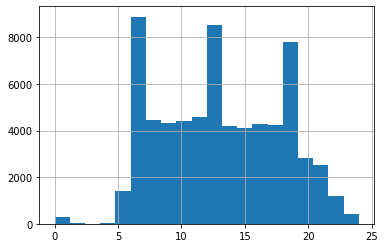

In [33]:
rf['DepTime_Hour'].hist(bins=20)

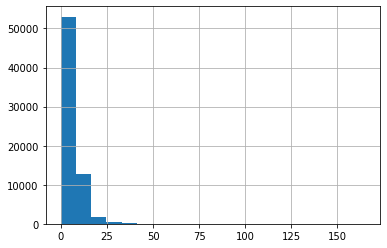

In [34]:
rf['TaxiIn'].hist(bins=20)

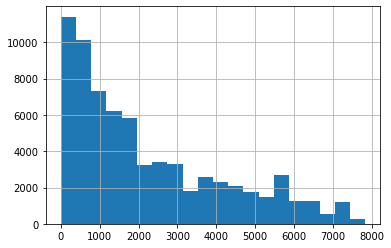

In [35]:


rf['FlightNum'].hist(bins=20)



Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [ ]:
def transform_data(data):
    # Your code here

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [ ]:
# Your code here

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rf_transform_data, vect, test_size=0.3, random_state=42)

NameError: name 'rf_transform_data' is not defined

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
# Your code here

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
# Your code here

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.

<img src = "https://avatars.mds.yandex.net/get-pdb/477388/e476df73-bac0-4768-a7ee-9a86824c344e/s1200">